# Fast Fourier Transform
## Category: Numerics
## Author: Christina Lee

In [3]:
using Plots;
gr()

Plots.GRBackend()

Again and again in numerics we use Fourier Transforms. Quantum Mechanics, Optics, Fluid Mechanics, circuits, pure differential equations: the applications are near endless.  While we often learn to perform analytic Fourier Transforms or write a simple Direct Fourier Transform (DFT), soon enough we learn to not waste effort and CPU cycles and just call a highly optimized low-level library like FFTW.  For example,

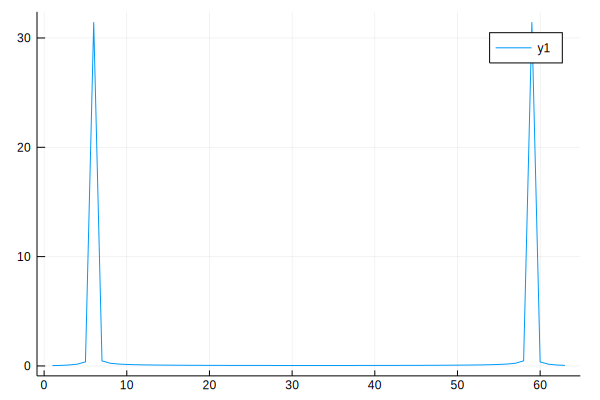

In [4]:
using FFTW;
result=fft(sin.(0:.5:10π))
plot(abs.(result))

shows the fft of a sin wave with peaks at the positive and negative frequencies of the sin data.

All I needed to do was import the FFTW library and call `fft()`.  Note: FFTW is under the GNU GPL license, so you might want a different library if you are developing something proprietary, like Intel's MKL.

In this simple example we can already notice several key things that will help us out later.  First, FFT returns a complex data array.  This is why I use `abs` to plot the results.  

Second, the domain of a Fourier transforms seems simple, but can cause endless problems.  Let's expand on the above simple syntax to some code where we calculate the domain for the fft.

In [ ]:
dx=.5
xmax=10π
xmin=0

data=sin.(xmin:dx:xmax)

N=length(data);
ldomain=xmax-xmin;

dk=2π/ldomain;

# All frequencies positive, same order as fft output
k_type1=collect(0:N-1)*dk

# Symmetric around Origin
if iseven(N) 
    k_type2=[collect(0:N/2) ; collect(-N/2:-1)]*dk
    else # N is odd
    k_type2=[collect(0:(N-1)/2) ; collect(-(N-1)/2:-1)]*dk
end

result=fft(data)
plot(k1,abs.(result))
plot!(k2,abs.(result))

There are two different ways we can calculate the domain.  One is symmetric around the origin and favored for conceptual purposes.  The second is how we get our data out of standard fft algorithms, where all frequencies are positive.  

## The DFT

$$
\sum_{i=0}^{N-1} e^{2\pi i k j/N} x_j
$$

In [80]:
xmax=10π
xmin=0
N=2^5

ldomain=xmax-xmin;
dk=2π/ldomain;

x=range(xmin,stop=xmax,length=N)
y=sin.(x);

# Symmetric around Origin
if iseven(N)
    k=[collect(1:N/2) ; collect(-N/2:-1)]*dk;
    else # N is odd
    k=[collect(0:(N-1)/2) ; collect(-(N-1)/2:-1)]*dk;
end;

k=collect(0:N-1)*dk;

In [91]:
fk=zeros(Complex{Float64},N);

for ik in 1:N # sum over momentum
    for jj in 1:N # sum over positions
        fk[ik]+=exp(2*π*im*ik*jj/N)*y[jj]    
    end
end

In [48]:
exp(2*pi*im*k[1]*10/N)*y[10]   

0.7889082749935933 + 0.07770068312419864im

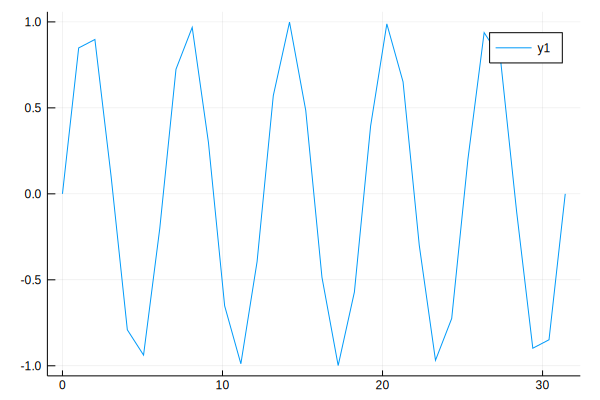

In [82]:
plot(x,y)

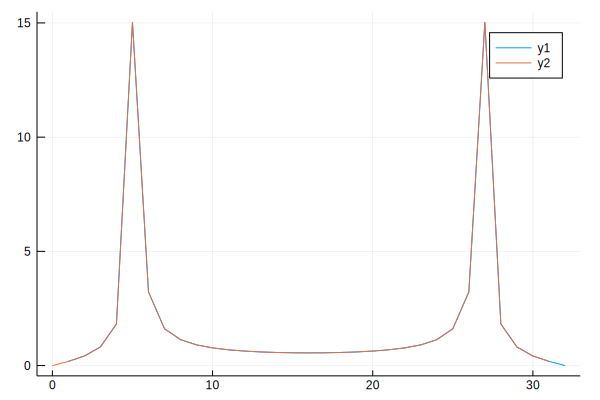

In [94]:
plot(k.+1,abs.(fk))
plot!(k,abs.(fft(y)))

## The FFT

The Fast Fourier Transform works by splitting one Fourier transform of length $N$ into two Fourier transforms of length $N/2$ via the formula 
$$
\sum_{i=0}^{N-1} e^{2\pi i k j/N} x_j
= \sum_{i=0}^{N/2-1} e^{2 \pi i k (2 j)/N} x_{2j} + \sum_{i=0}^{N/2-1} e^{2\pi i k (2 j + 1)/N} x_{2j+1}
$$
$$
= \sum_{i=0}^{N^{\prime}-1} e^{2 \pi i k j/N^{\prime}} x_{2j} + e^{2\pi i k/ N^{\prime}} \sum_{i=0}^{N^{\prime}-1} e^{2\pi i k j/N^{\prime}} x_{2j+1}
$$

Once this formula is applied once, nothing stops us from applying the formula again and again until $N^{\prime \dots} = 1$. 

Taking this the reverse direction, a Fourier transform of two data points is
$$
x_0 + e^{2\pi i k/ 1} x_1
$$
and then building to four data points,
$$
\left( x_0 + e^{2\pi i k /1} x_1 \right) + e^{2\pi i k /4} \left( x_2 + e^{2\pi i k/1} x_3 \right)
$$
So on and so forth...


To calculate the FFT, we need to evaluate the exponential multiplying each data point.

Combining from single data points to Fourier transforms of two data points, each point with an even index will be left untouched.  Each point with an odd index will get a $e^{2\pi i k/1}$ term.  

For example, in this picture all the red points be multiplied by $1$, but blue points will get $e^{2\pi i k/1}$.

![pic](fft_step1.svg)